In [1]:
#Import the libraries
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

In [ ]:

args = sys.argv
filename = args[1]
df = pd.read_table(filename)

In [18]:
df=pd.read_table("../data/scoreswithnames.tab")
df=df.rename(columns={ df.columns[0]: "met" })
met = df['met']

In [19]:
df.drop(labels=['met'], axis=1,inplace = True)
df.insert(5, 'met', met)
df=df.sort_values('sulfur', ascending=False)

In [20]:
df.columns[:-1]
df.columns

Index(['sulfur', 'carbon', 'oxygen', 'iron', 'nitrogen', 'met'], dtype='object')

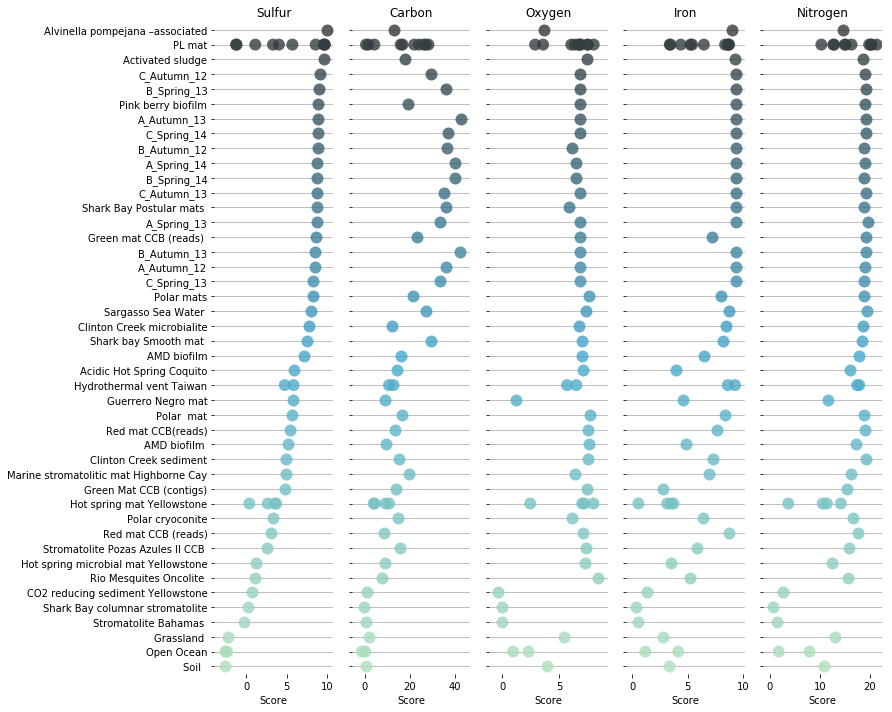

In [33]:
# Make the PairGrid
g = sns.PairGrid(df.sort_values(["sulfur","carbon","nitrogen","iron","oxygen"], ascending=[False,False,False, False,False]),
                x_vars=df.columns[:-1], y_vars=['met'],
                size=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=12, orient="h",
       palette="GnBu_d",edgecolor="gray", alpha=0.8)

# Use the same x axis limits on all columns and add better labels

g.set(xlabel="Score", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Sulfur", "Carbon", "Oxygen", "Iron", "Nitrogen"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig("../figures/metacomparision.png", dpi=500, bbox_inches='tight')